In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import requests
import scipy.stats as stats
from scipy.stats import linregress
#from api_key import api_key

# Comparison of Number of Traffic Accidents per Weather Condition in San Antonio, TX.

The question: What is the best weather condition to drive in?

The Hypothesis: The amount of rain will not affect the number of accidents.

## Dataset: US Accidents (4.2 million records)
Source:https://www.kaggle.com/sobhanmoosavi/us-accidents

Description: Reported accidents over US from 2016-Dec 2020, includes location of accident, date of the occurance, weather at time of the accident, and other variables.

## Cleaned CSV: cleaned_2018_texas_accidents.csv
Data Extrapilated: Accidents that occurred in Texas in 2018, including the weather, location and time of occurance.

Refer to cleaning_csv.ipynb

In [2]:
csv_read = pd.read_csv("../cleaned_2018_texas_accidents.csv")
texas_accidents_df = pd.DataFrame(csv_read)
texas_accidents_df.head()

,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day
0,195997,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,66.9,90.0,29.79,8.0,4.6,0.0,Overcast,2018,11,30
1,195998,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
2,196000,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
3,196019,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30
4,196021,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30


#### Pulled out accidents that only occured with San Antonio

Grouped by weather condition to get count of accidents.

In [3]:
# san antonio accident data
sa_df = texas_accidents_df.loc[texas_accidents_df['City']=='San Antonio']
sa_weather1 = sa_df.groupby('Weather_Condition')
sa_weather = sa_weather1['Time'].count()
sa_weather

Weather_Condition
Clear                            17
Fog                               5
Haze                              1
Heavy Rain                       30
Heavy Thunderstorms and Rain     15
Light Drizzle                    65
Light Freezing Rain               9
Light Rain                      379
Light Snow                        3
Light Thunderstorms and Rain     23
Mostly Cloudy                    41
Overcast                        200
Partly Cloudy                     6
Rain                             36
Scattered Clouds                 10
Thunderstorm                      3
Thunderstorms and Rain           11
Name: Time, dtype: int64

## Charts based on data

Chart I: Bar chart showing the number of accidents per weather condition.

In [4]:
x_axis = sa_weather.index.to_list

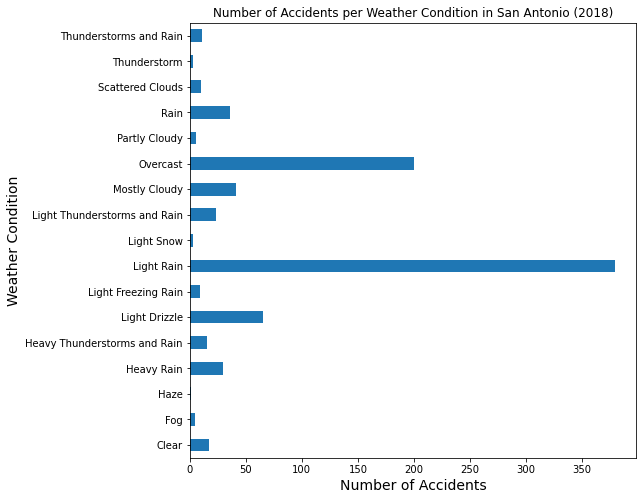

In [11]:
sa_weather_chart = sa_weather.plot.barh(x=x_axis, figsize=(8, 8), title='Number of Accidents per Weather Condition in San Antonio (2018)')
sa_weather_chart.set_xlabel("Number of Accidents", fontsize=14)
sa_weather_chart.set_ylabel("Weather Condition", fontsize=14)
plt.savefig("Images/accident_per_weather_bar.png")
plt.show()

Conclusion based on Chart I: Discounting weather conditions that don't occur very often in San Antonio, we can conclude that the best driving conditions are partly cloudy, clear, and scatterd clouds. The worse condition to drive in is light rain.

### Accidents based on visibility conditions

Grouped dataframe based on visibility column for charting.

In [88]:
sa_visibility = sa_df.groupby('Visibility(mi)')
sa_visibility = sa_visibility['Time'].count()

Chart II: Number of Accidents based on visibility.

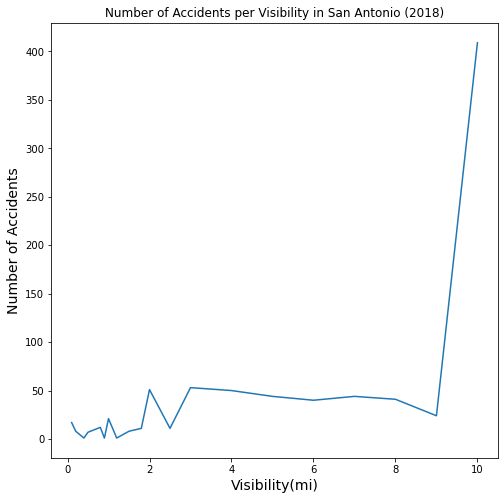

In [86]:
#Charting with pandas
x_axis2 = sa_visibility.index.to_list
sa_visib_chart = sa_visibility.plot.line(y=x_axis2, figsize=(8,8), title="Number of Accidents per Visibility in San Antonio (2018)")
sa_visib_chart.set_xlabel("Visibility(mi)", fontsize=14)
sa_visib_chart.set_ylabel("Number of Accidents", fontsize=14)
plt.savefig("Images/accident_per_visibility_line.png")
plt.show()

Conclusion based on chart II: There are more accidents at time where there is a high visibility.

### Accidents based on precipitation conditions

Grouped dataframe based on precipitation column for charting.

In [50]:
#Grouping original dataframe by precipitation column
group_by_prec = sa_df.groupby('Precipitation(in)')
sa_precipitation = group_by_prec.count()
y_axis2 = sa_precipitation.index.to_list()
sa_precipitation = sa_precipitation['Time'].tolist()

Making bins for precipitation level for cleaner graphing.

In [97]:
sa_df['Precipitation(in)'].max()
bins=[0,.5,1,1.5]
labels=['0-0.5 in','0.6-1.0 in', '1.1-1.5 in']
sa_df['Precip_level'] = pd.cut(sa_df["Precipitation(in)"], bins, labels=labels, include_lowest=True)


C:\Users\Courtney\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [98]:
#grouping by precipitation level bins
group_prec_level = sa_df.groupby('Precip_level')
sa_prec_level = group_prec_level.count()
#converting data to list for plotting
x_axis = sa_prec_level.index.to_list()
sa_prec_level = sa_prec_level['Time'].tolist()

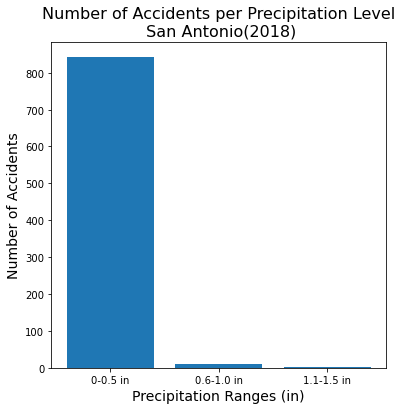

In [108]:
plt.figure(figsize=(6,6))
plt.bar(x_axis, sa_prec_level)
plt.title('Number of Accidents per Precipitation Level\n San Antonio(2018)', fontsize=16)
plt.xlabel('Precipitation Ranges (in)', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.savefig("Images/accident_per_precip_bar.png")
plt.show()

Conclusion based on Chart III: There are significantly more accidents when there is very little precipitation on the road.

Chart III: Correlation comparison between visibility and precipitation.

The r-squared is: 0.05363970711032953


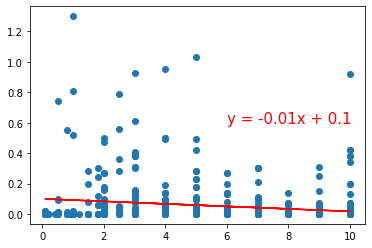

In [85]:
x_values = sa_df['Visibility(mi)']
y_values = sa_df['Precipitation(in)']
plt.scatter(x_values, y_values, marker='o')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0.6),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Conclusion based on Chart IV: There is no correlation between visibility and the precipitation in regards to number of accidents.

### Accidents based on temperature

Chart IV: Histogram showing temperature values compared to number of accidents which shows a relatively normal distribution.

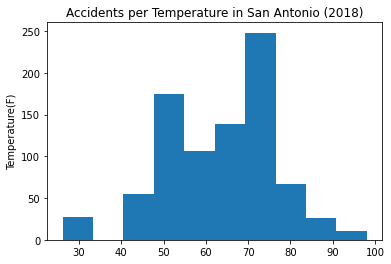

In [87]:
fig1, ax1 = plt.subplots()
ax1.set_title('Accidents per Temperature in San Antonio (2018)')
ax1.set_ylabel('Temperature(F)')
ax1.hist(sa_df['Temperature(F)'])
plt.show()

Grouped dataframe based on temperature column for charting.

In [25]:
# grouping original dataframe by temperature.
sa_temp = sa_df.groupby('Temperature(F)')
temp_count = sa_temp['Time'].count()
print(temp_count)
print(sa_df['Temperature(F)'].max())

Temperature(F)
26.1     3
27.0    10
27.9     1
28.0     2
28.2     2
        ..
91.0     4
91.8     2
93.9     3
96.1     1
98.1     1
Name: Time, Length: 135, dtype: int64
98.1


Made bins for temperatures to see how many accidents happen during certain ranges.

In [78]:
bins = [0,20,40,60,80,100]
labels = ['0-20','21-40','41-60','61-80','81-100']
sa_df['Bins'] = pd.cut(sa_df['Temperature(F)'], bins=bins, labels=labels, include_lowest=True)


C:\Users\Courtney\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Chart V: Bar chart of Temperature bins

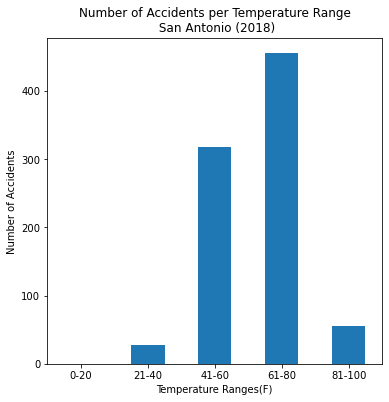

In [124]:
temp_group = sa_df.groupby(['Bins'])
temp_group = temp_group['Time'].count()
temp_chart = temp_group.plot.bar(figsize=(6,6), title='Number of Accidents per Temperature Range\n San Antonio (2018)')
temp_chart.set_xlabel("Temperature Ranges(F)")
temp_chart.set_ylabel('Number of Accidents')
plt.xticks(rotation='horizontal')
plt.savefig("Images/accident_per_temp_bar.png")
plt.show()

Conclusion based on Chart V: Most of the accidents occur when the temperature is between 61-80 degrees Farenheit.

## Statistical analysis

### Chi Square - for precipitation(in)

In [119]:
#collecting data to compare
#grouping by precipitation level bins
group_prec_level = sa_df.groupby('Precip_level')
sa_prec_level = group_prec_level.count()

Based on hypothesis stated above, assigned expected values with a 25%, 25%, 50% split from the total count of accidents in San Antonio.

In [118]:
#dataframe for chi square to include observed and expected
weather_conditions = pd.DataFrame({
    'Observed':sa_prec_level['Time'],
    'Expected': [236, 236, 472]
})
weather_conditions

,Observed,Expected
Precip_level,,
0-0.5 in,842,236
0.6-1.0 in,10,236
1.1-1.5 in,2,472


In [120]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [121]:
# Run the chi square test with stats.chisquare()
stats.chisquare(weather_conditions['Observed'], weather_conditions['Expected'])

Power_divergenceResult(statistic=2240.5169491525426, pvalue=0.0)

## Final Conclusion:

Since the chi square value of 2240.5 exceeds the critical value of 5.99, we conclude that the results are statistically significant. This is proving that our hypothesis is incorrect and that more precipiation on the road does not cause more accidents.